 <div style="font-size: 34px">
<font color='blue'> <b>FROM DATA TO DELIGHT: BUILDING AN ANIME RECOMMENDER</b></font>



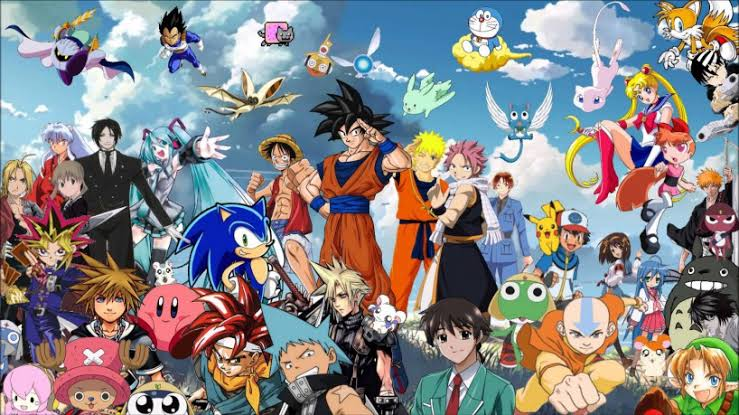

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
       * [1.1.1 Problem Statement](#sub_section_1_1_1)  
* <b>[2. Importing Packages](#chapter3)
* <b>[3. Loading Data](#chapter4)
* <b>[4. Data Cleaning](#chapter5)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter6)


#[1. Project Overview](#chapter1)
## [1.1 Introduction](#section_1_1)

In today's digital era, recommender systems play a crucial role in helping people find content that suits their interests. Platforms like Netflix, Amazon Prime, Showmax, and Disney rely on sophisticated algorithms to suggest movies and shows tailored to individual preferences. But have you ever wondered how these platforms seem to know your tastes so well?

This project aims to develop a recommender system specifically for anime titles, leveraging advanced machine learning techniques. The system will help anime fans discover new shows that match their unique preferences, making the viewing experience more enjoyable and personalized.

### [1.1.1 Problem Statement](#sub_section_1_1_1)

The primary goal of this project is to create a recommender system that can accurately predict how users will rate anime titles they haven't watched yet. We will achieve this by combining collaborative filtering and content-based filtering methods, using a comprehensive dataset from myanimelist.net.

Key challenges we will address include:

1. **Data Analysis and Preparation:** Cleaning and organizing the dataset to ensure it's suitable for building our models.
2. **Collaborative Filtering:** Developing a model that recommends anime based on the preferences of users with similar tastes.
3. **Content-Based Filtering:** Creating a model that suggests anime based on the characteristics of the titles a user has already enjoyed.
4. **Hybrid Approach:** Integrating both collaborative and content-based filtering methods to enhance recommendation accuracy.
5. **Evaluation and Optimization:** Testing our system and fine-tuning it to provide the best possible recommendations.

By tackling these challenges, we'll create a powerful recommender system that not only helps users discover new anime but also enhances their overall viewing
experience. This project highlights the impact of machine learning in revolutionizing how we find and enjoy content in the entertainment industry.


# [2. Importing Packages](#chapter3)

By importing these libraries, you prepare your environment to handle the entire machine learning pipeline, from data cleaning and model training and visualization. Each library and function has a specific role that contributes to building a robust and reliable machine learning model.

In [2]:
import pandas as pd
import numpy as np
import re
import html
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# [3. Loading Data](#chapter4)

This project utilizes a comprehensive dataset to develop our anime recommender system. The dataset includes information about various anime content, such as movies, television series, music, specials, OVAs (Original Video Animations), and ONAs (Original Net Animations). The data is divided into several files:
anime.csv: Contains details about each anime.
train.csv: Contains user rating data for individual anime titles.
test.csv: Used for creating the final submission.

The dataset can be accessed [here](https://www.kaggle.com/competitions/anime-recommender-system-project-2024/data)

By analyzing and utilizing this dataset, we aim to create a robust recommender system that helps users discover new anime titles that align with their preferences.

In [3]:
# Load and Define the datasets
anime_df = pd.read_csv('anime.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Exploring the Dataset

In this section, we will explore the dataset to understand its structure and the information it contains. The code snippets below provide an overview of the dataset's shape, the number of unique categories in the 'category' column, and metadata information about the dataset.

In [4]:
# Verify the loaded datasets
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
train_df.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


In [6]:
# Inspect the anime dataset
print(anime_df.info())
print(anime_df.describe())

# Inspect the train dataset
print(train_df.info())
print(train_df.describe())

# Inspect the test dataset
print(test_df.info())
print(test_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None
           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06
<class 'pandas.core.frame.DataFrame'>
Ra

# [5. Data Cleaning](#chapter5)

Data data cleaning, refers to the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis or other purposes. It involves several tasks aimed at ensuring that the data is accurate, complete, and consistent.

It is an essential step in the data analysis process as it helps improve the quality, reliability, and usability of the data, leading to more accurate and insightful analysis results. Below are some common tasks involved in data clean up:

1. Check for Missing Values AND Handle Missing Values: identify missing values in the DataFrame and you can choose to drop rows with missing values, fill them with a specific value, or use more advanced imputation techniques.
2. Check for Duplicates AND Handle Duplicates: Identify duplicate rows in the DataFrame and if they are found, you can choose to drop them.
3. Decode HTML entities
4. Ensure correct data types
5. Remove non-alphanumeric characters
6. Convert text columns to lowercases
7. Remove Extra Whitespace
8. Finding Unique Categories




In [7]:
#1 Check for missing values
print(anime_df.isnull().sum())
print(train_df.isnull().sum())
print(test_df.isnull().sum())

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64
user_id     0
anime_id    0
dtype: int64


The information above comfirms that there are missing values in the anime.csv dataset and none in the train.csv and test.csv, therefor we need to handle the missing values in the anime.csv appropriately to ensure the dataset is clean and ready for analysis.

The code snippet below potrays the steps to handle the missing values for each column:



In [8]:
# Handle missing values in 'genre' by imputing with the most common genre

anime_df.dropna(subset=['genre','type','name','rating'], inplace=True)


# Verify that there are no more missing values
print(anime_df.isnull().sum())



anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [9]:
#2 Check for duplicates based on all columns
print(anime_df.duplicated().sum())
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
1
0


The information above comfirms that there is 1 duplicate in the train_df and none in the anime_df and test_df, therefor we need to handle the duplicate in the train_df appropriately to ensure the dataset is clean and ready for analysis. Here is the step to handle the duplicate:

* Remove the duplicate by dropping it

In [10]:
# Remove duplicates
train_df.drop_duplicates(inplace=True)
# Verify that there are no more duplicates
print(train_df.duplicated().sum())


0


In [11]:
#3 Clean the 'name' column by decoding HTML entities
anime_df['name'] = anime_df['name'].apply(html.unescape)

#4 Ensure correct data types
anime_df['rating'] = anime_df['rating'].astype(float)
anime_df['members'] = anime_df['members'].astype(int)

#5 Remove non-alphanumeric characters from the 'name' column
anime_df['name'] = anime_df['name'].apply(lambda x: re.sub(r'\W+', '', x))
#6 Convert name,genre and type columns to lowercases
anime_df['name'] = anime_df['name'].str.lower()
anime_df['genre'] = anime_df['genre'].str.lower()
anime_df['type'] = anime_df['type'].str.lower()

# Display the cleaned DataFrame
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,kiminonawa,"drama, romance, school, supernatural",movie,1,9.37,200630
1,5114,fullmetalalchemistbrotherhood,"action, adventure, drama, fantasy, magic, mili...",tv,64,9.26,793665
2,28977,gintama,"action, comedy, historical, parody, samurai, s...",tv,51,9.25,114262
3,9253,steinsgate,"sci-fi, thriller",tv,24,9.17,673572
4,9969,gintama,"action, comedy, historical, parody, samurai, s...",tv,51,9.16,151266


### Remove Extra Whitespace

**Purpose:** Extra whitespace (multiple spaces, tabs, etc.) can exist due to formatting or data collection processes and does not add meaningful information to the text.

**Benefit:** Cleaning up whitespace ensures uniformity in text presentation and makes subsequent text processing steps more consistent and reliable. It also improves readability and aesthetics when presenting or storing processed text data.

In [12]:
# Remove white spaces from 'name' and 'genre' columns
anime_df['name'] = anime_df['name'].str.replace(' ', '')
anime_df['genre'] = anime_df['genre'].str.replace(' ', '')

print(anime_df)

       anime_id                                        name  \
0         32281                                  kiminonawa   
1          5114               fullmetalalchemistbrotherhood   
2         28977                                     gintama   
3          9253                                  steinsgate   
4          9969                                     gintama   
...         ...                                         ...   
12289      9316       toushindaimyloverminamitaimechaminami   
12290      5543                                  underworld   
12291      5621                  violencegekigadavidnohoshi   
12292      6133  violencegekigashindavidnohoshiinmadensetsu   
12293     26081                  yasujinopornoramayacchimae   

                                                   genre   type episodes  \
0                      drama,romance,school,supernatural  movie        1   
1      action,adventure,drama,fantasy,magic,military,...     tv       64   
2      action,c

### Finding Unique Categories:

**Purpose:** To identify all distinct values in specific columns.
Benefits:
**Unique Genres:** By finding unique genres, we can understand the variety of genres present in the dataset and potentially group or filter data based on genre. This is useful for recommendations, filtering, and analysis.

**Unique Types:** Knowing the unique types (e.g., TV, Movie) helps in categorizing the data and understanding the distribution of different types of anime.

**Unique Names:** Identifying unique names ensures that there are no duplicates and helps in understanding the variety of entries in the dataset.


In [13]:
# Get unique categories
unique_genres = set()
anime_df['genre'].str.split(',').apply(unique_genres.update)

unique_types = anime_df['type'].unique()
unique_names = anime_df['name'].unique()

print("Unique Genres:")
print(unique_genres)
print("\nUnique Types:")
print(unique_types)
print("\nUnique Names:")
print(unique_names)

Unique Genres:
{'sports', 'mecha', 'dementia', 'superpower', 'sliceoflife', 'harem', 'thriller', 'seinen', 'historical', 'space', 'hentai', 'music', 'martialarts', 'psychological', 'demons', 'yuri', 'school', 'kids', 'shoujoai', 'shounenai', 'shounen', 'parody', 'drama', 'mystery', 'romance', 'sci-fi', 'adventure', 'game', 'supernatural', 'police', 'fantasy', 'military', 'ecchi', 'yaoi', 'vampire', 'action', 'josei', 'cars', 'shoujo', 'samurai', 'comedy', 'horror', 'magic'}

Unique Types:
['movie' 'tv' 'ova' 'special' 'music' 'ona']

Unique Names:
['kiminonawa' 'fullmetalalchemistbrotherhood' 'gintama' ...
 'violencegekigadavidnohoshi' 'violencegekigashindavidnohoshiinmadensetsu'
 'yasujinopornoramayacchimae']


# Exploratory Data Analysis

A crucial step in any machine learning project, including unsupervised learning. Here are some common EDA techniques and steps you can use for your unsupervised machine learning project:

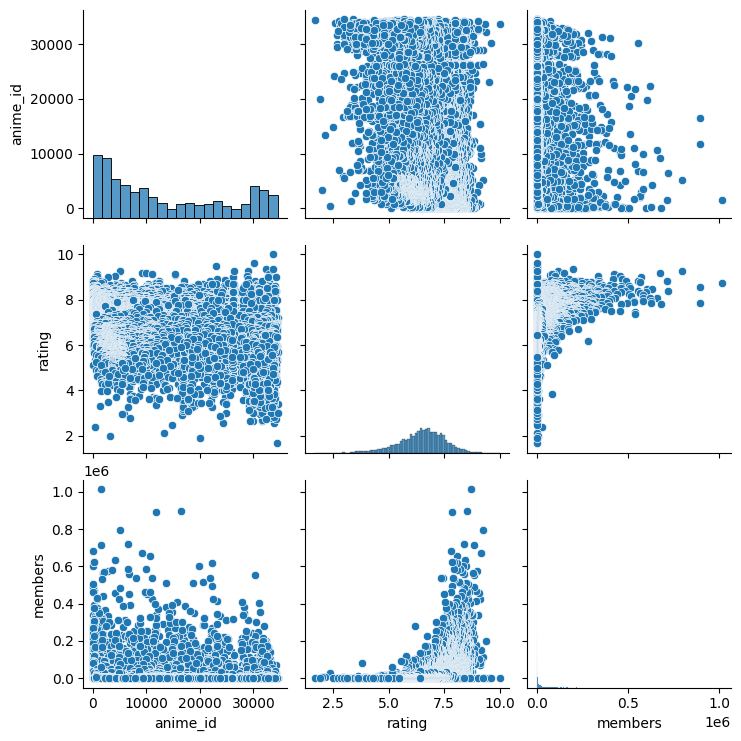

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Visualization
sns.pairplot(anime_df)
plt.show()

### Distribution of Ratings:

Histogram to visualize the distribution of ratings.
python


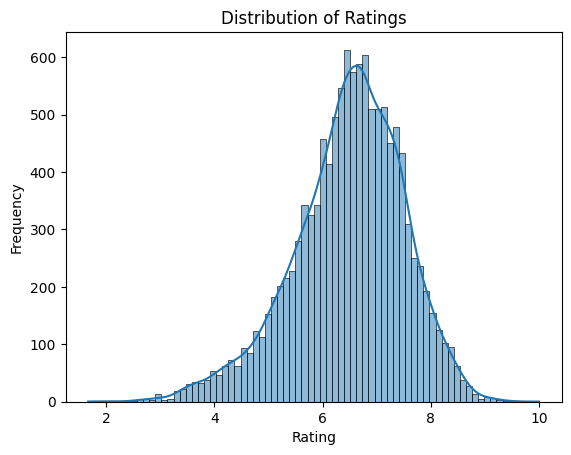

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(anime_df['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


### Distribution of Members:

Histogram to visualize the distribution of members.

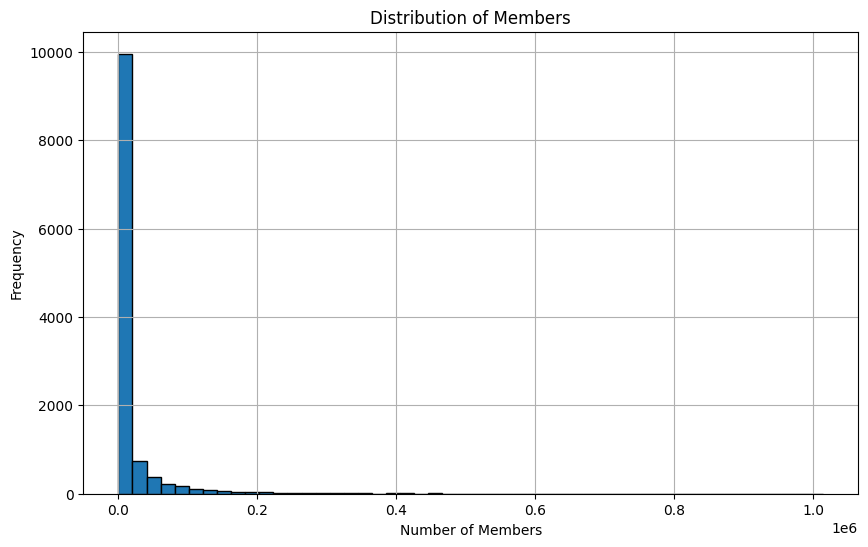

In [16]:
import matplotlib.pyplot as plt

# Create a histogram for the 'members' column
plt.figure(figsize=(10, 6))
plt.hist(anime_df['members'].dropna(), bins=50, edgecolor='black')  # dropna() to handle any NaN values
plt.title('Distribution of Members')
plt.xlabel('Number of Members')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [17]:
import plotly.express as px

# Create an interactive box plot for the 'members' column
fig = px.box(anime_df, x='members', title='Distribution of Members')

# Show the plot
fig.show()


### Type Distribution:

Bar plot to visualize the distribution of anime types.

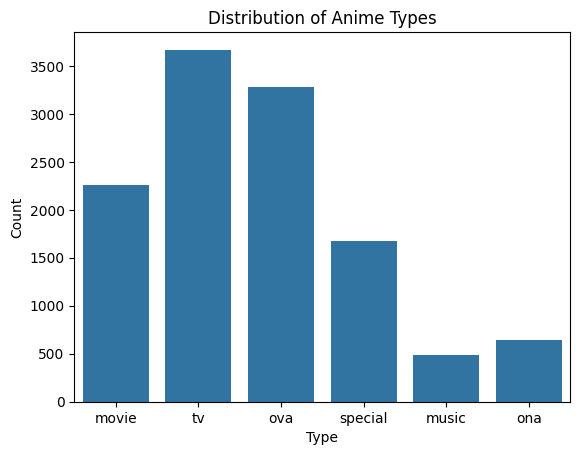

In [18]:
sns.countplot(x='type', data=anime_df)
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


The graph illustrates the distribution of different anime types. The 'TV' category has the highest count, followed by 'Movie' and 'OVA.' 'Special' shows moderate representation, whereas 'Music' and 'ONA' have fewer entries. This visualization highlights the relative popularity and production volume of various anime formats.

### Plotting the Most Watched Genre

To plot the most watched genre, we will follow these steps:

1. **Split the genres into individual genres for each anime.**
2. **Count the occurrences of each genre.**
3. **Plot the counts.**

Here’s the Python script using pandas and matplotlib to accomplish this:


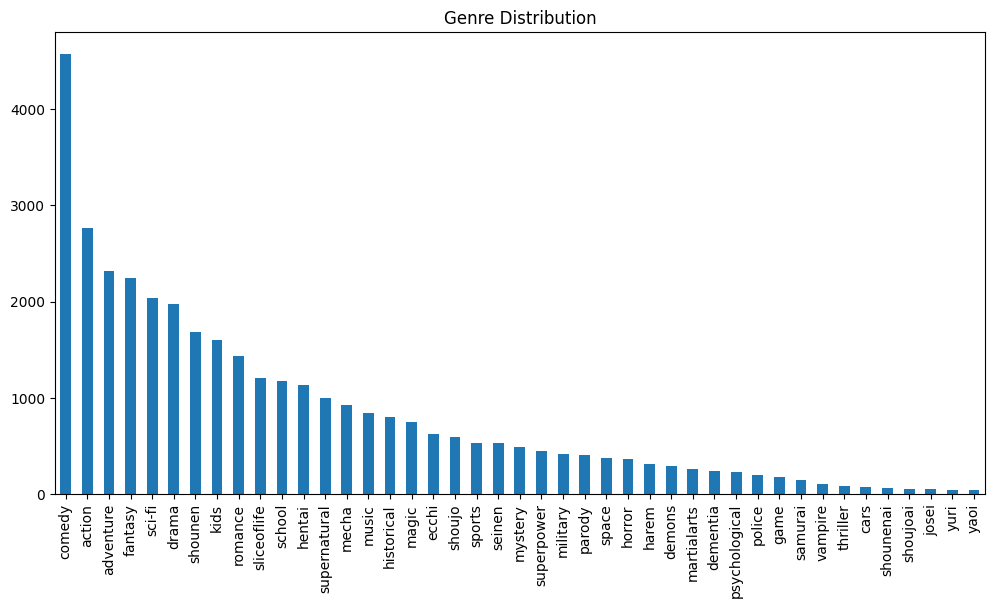

In [19]:
# Analysis of genres
genres = anime_df['genre'].str.get_dummies(sep=',')
genre_counts = genres.sum().sort_values(ascending=False)
genre_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Genre Distribution')
plt.show()

The graph illustrates the viewership distribution across various media genres, with "Comedy" leading as the most-watched genre, its bar extending slightly beyond 4,000 on the horizontal axis. The bars for other genres decrease in height, indicating lower viewership compared to comedy. Genres like Action, Adventure, and Fantasy also have substantial viewership but are less popular than comedy. In contrast, genres such as Horror, Mystery, and Thriller exhibit lower viewership, as reflected by their shorter bars. This distribution highlights the dominant popularity of comedy relative to other genres and provides insight into audience preferences.

 #### Encoding Categorical Data
Convert categorical data to numerical data.

In [20]:
from sklearn.preprocessing import LabelEncoder

# Encode 'type'
#type_encoder = LabelEncoder()
#anime_df['type'] = type_encoder.fit_transform(anime_df['type'])

# Encode 'genre'
# Use MultiLabelBinarizer since 'genre' has multiple values per row
#from sklearn.preprocessing import MultiLabelBinarizer

#mlb = MultiLabelBinarizer()
#anime_df = anime_df.join(pd.DataFrame(mlb.fit_transform(anime_df.pop('genre').str.split(',')),columns=mlb.classes_,index=anime_df.index))


In [21]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,kiminonawa,"drama,romance,school,supernatural",movie,1,9.37,200630
1,5114,fullmetalalchemistbrotherhood,"action,adventure,drama,fantasy,magic,military,...",tv,64,9.26,793665
2,28977,gintama,"action,comedy,historical,parody,samurai,sci-fi...",tv,51,9.25,114262
3,9253,steinsgate,"sci-fi,thriller",tv,24,9.17,673572
4,9969,gintama,"action,comedy,historical,parody,samurai,sci-fi...",tv,51,9.16,151266


### Correlation Matrix:

Calculate and visualize the correlation matrix to understand relationships between numerical features.


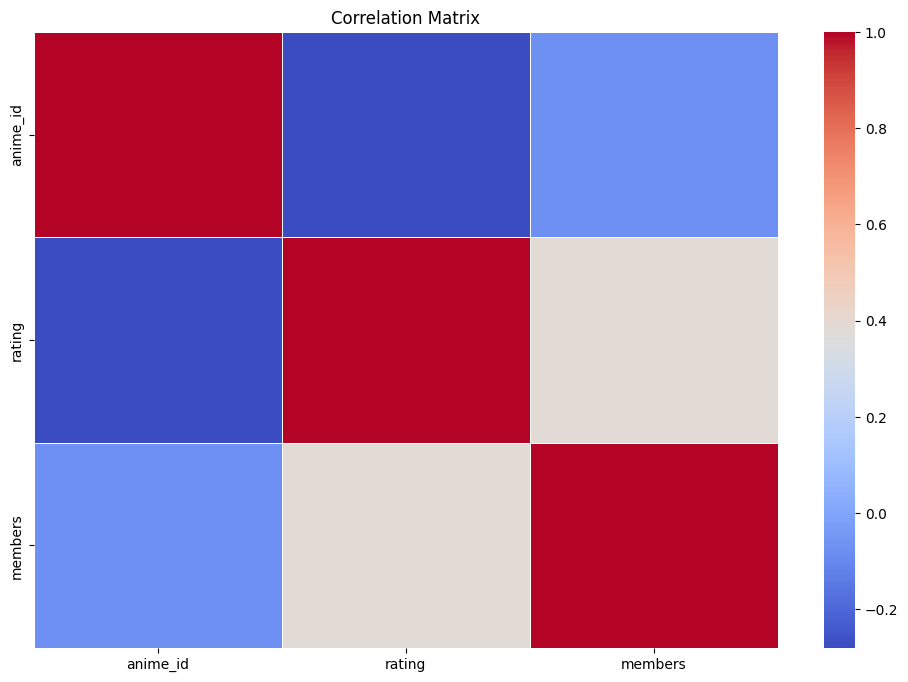

In [22]:
# Select only numeric columns
numeric_columns = anime_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Average Rating: 8.506000000000002
Total Episodes: 372525641325220242625


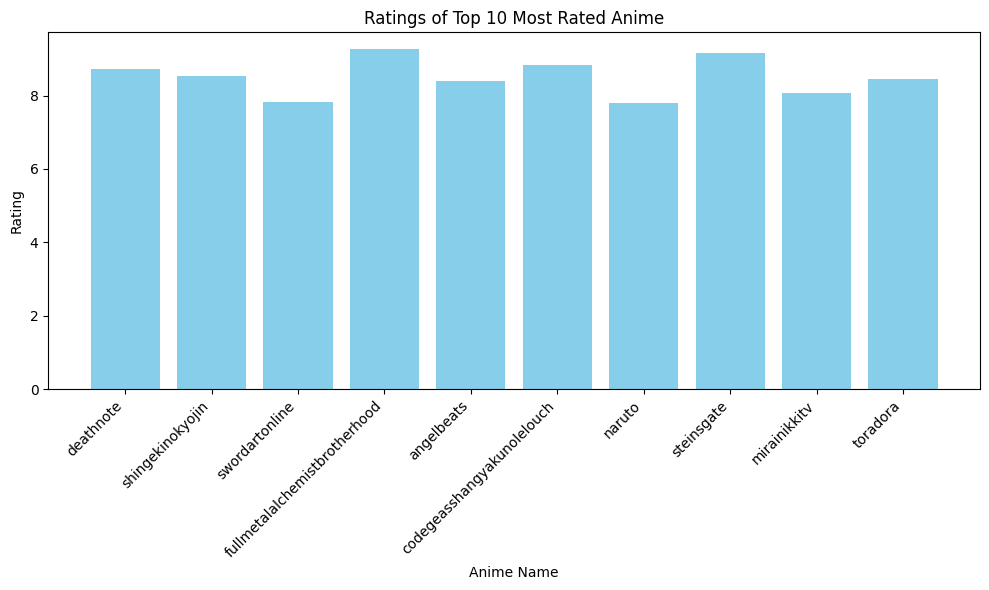

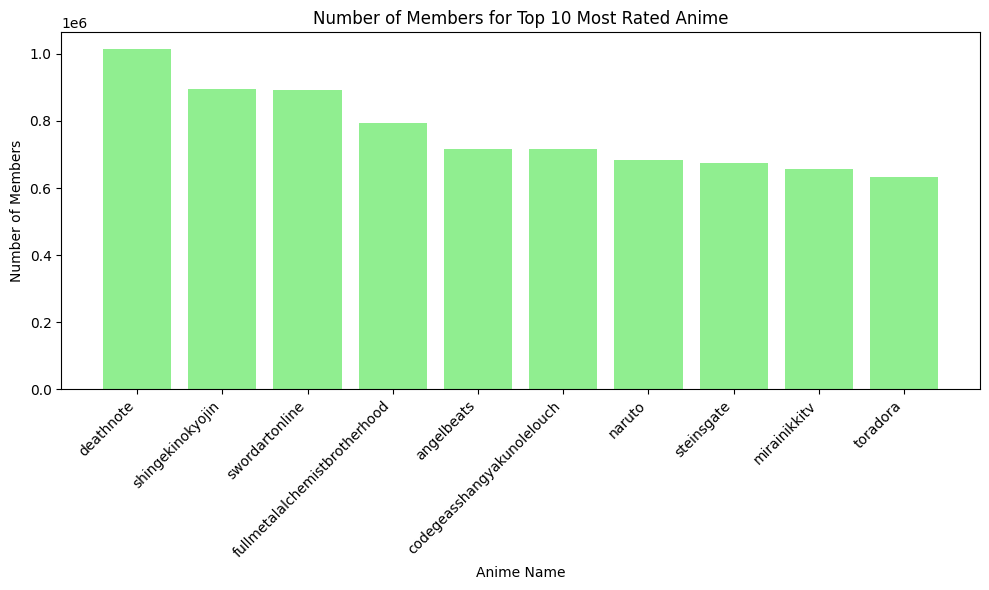

In [23]:
# Sort by 'members' column and get top 10
top_10 = anime_df.sort_values(by='members', ascending=False).head(10)

# Calculate basic statistics
average_rating = top_10['rating'].mean()
total_episodes = top_10['episodes'].sum()

# Print basic statistics
print(f"Average Rating: {average_rating}")
print(f"Total Episodes: {total_episodes}")

# Plot the ratings
plt.figure(figsize=(10, 6))
plt.bar(top_10['name'], top_10['rating'], color='skyblue')
plt.xlabel('Anime Name')
plt.ylabel('Rating')
plt.title('Ratings of Top 10 Most Rated Anime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the number of members
plt.figure(figsize=(10, 6))
plt.bar(top_10['name'], top_10['members'], color='lightgreen')
plt.xlabel('Anime Name')
plt.ylabel('Number of Members')
plt.title('Number of Members for Top 10 Most Rated Anime')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Train_df Analysis

In [24]:
# Unique counts
print('Number of unique users:', train_df['user_id'].nunique())
print('Number of unique animes:', train_df['anime_id'].nunique())


Number of unique users: 69481
Number of unique animes: 9838


#### Ratings per User
Analyze the number of ratings each user has provided.

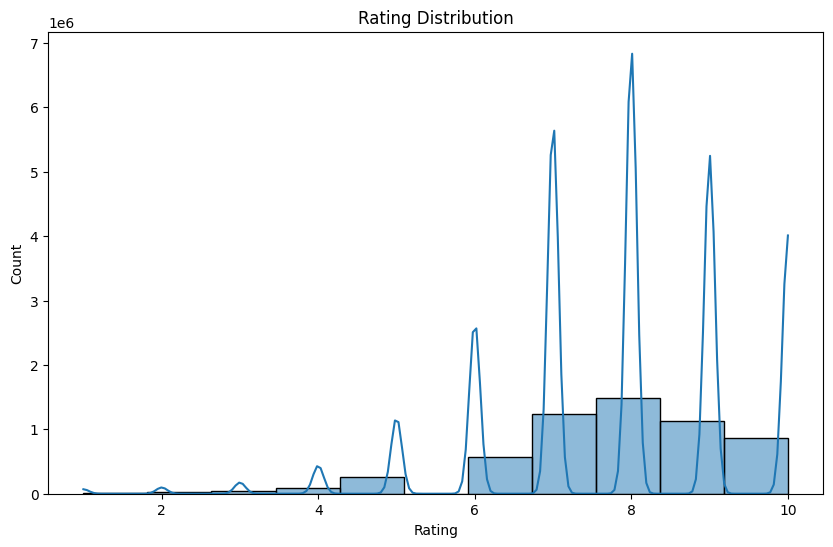

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['rating'], bins=11, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


The rating distribution graph reveals several key insights. First, there are peaks at specific rating values (e.g., 8), indicating common preferences among viewers or many items received an 8 out of 10 rating. Second, the spread of ratings varies, suggesting diverse opinions. Third,it is a negatively skewed distribution (long tail on the left) which indicates that more ratings are concentrated toward the lower end. In the context of anime ratings, this suggests that most anime received positive but not exceptionally high ratings, with only a few exceptional titles driving the overall trend.

#### Ratings per Anime
Analyze the number of ratings each anime has received.

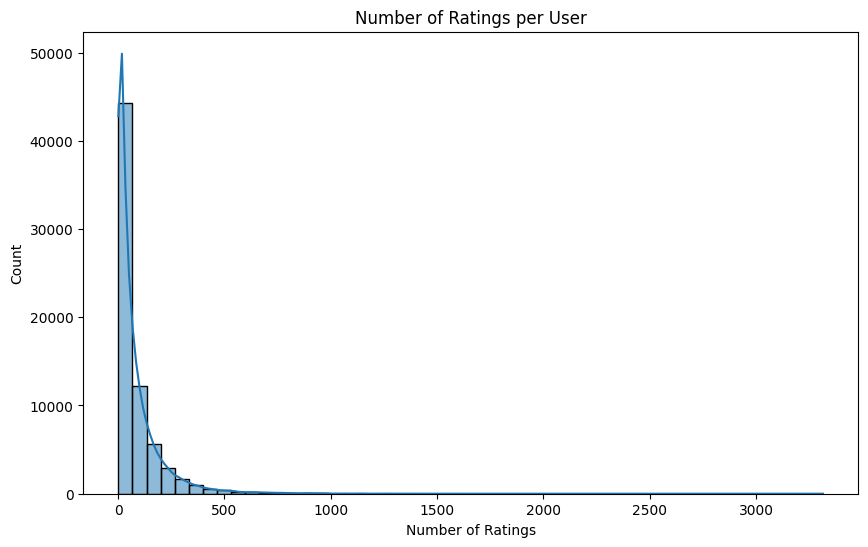

In [26]:
# Number of ratings per user
ratings_per_user = train_df['user_id'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()


The histogram titled "Number of Ratings per User" shows a left-skewed distribution, meaning the majority of users have rated only a few items, while a smaller group has rated many items. This is evident from the decreasing trend from left to right, with most users concentrated on the left side of the histogram, indicating infrequent rating activity. The long tail on the right side signifies the few users who contribute a high number of ratings. This distribution highlights significant variability in user engagement, where the majority are casual raters and only a minority are highly active. Understanding this pattern can help tailor recommendation systems: for infrequent raters, general trends or popular items might be more relevant, whereas more personalized recommendations could be designed for the highly active users. This insight into user behavior is essential for optimizing the recommender system to serve both casual and engaged users effectively.

#### Average Rating per Anime
Calculate and plot the average rating for each anime.

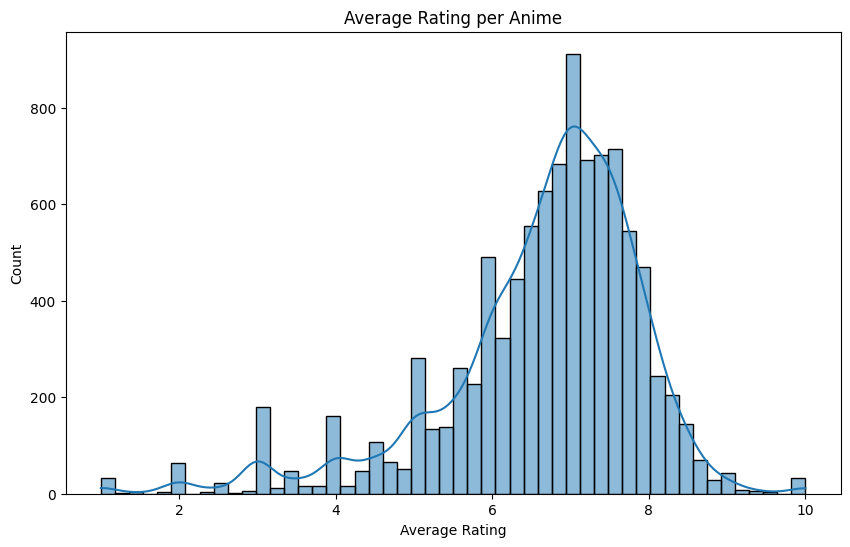

In [27]:
# Average rating per anime
average_rating_per_anime = train_df.groupby('anime_id')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(average_rating_per_anime, bins=50, kde=True)
plt.title('Average Rating per Anime')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()


The histogram titled "Number of Ratings per Anime" reveals a right-skewed distribution, where the number of ratings per anime increases from left to right. This suggests that while many anime titles receive only a few ratings, a smaller number of titles garner a significantly higher number of ratings. This pattern highlights that popular anime tend to attract more ratings, whereas less popular titles receive fewer. Understanding this distribution is important for optimizing recommendation systems: popular titles might be featured more prominently, while strategies may be needed to enhance the visibility of less-rated anime.

#### Summary Statistics by User and Anime
Get summary statistics for each user and anime to understand their rating behavior.

In [ ]:
# Summary statistics by user
user_summary = train_df.groupby('user_id')['rating'].agg(['count', 'mean', 'std', 'min', 'max'])
print(user_summary.describe())

# Summary statistics by anime
anime_summary = train_df.groupby('anime_id')['rating'].agg(['count', 'mean', 'std', 'min', 'max'])
print(anime_summary.describe())


#### User-Anime Interaction Matrix
Calculate interaction statistics like the number of ratings per user for each anime.

In [ ]:
# Number of ratings per user
user_interaction_counts = train_df.groupby('user_id')['anime_id'].count()
print(user_interaction_counts.describe())

# Number of ratings per anime
anime_interaction_counts = train_df.groupby('anime_id')['user_id'].count()
print(anime_interaction_counts.describe())


The analysis of the number of ratings per user and per anime reveals the following:

- **Users**: On average, each user rates about 82 items, though this varies widely, with some users rating as few as 1 item and others up to 3,315. The distribution is skewed, with most users rating a relatively small number of items, while a few rate extensively.

- **Anime**: Each anime receives an average of 580 ratings, but there is considerable variability, with some anime getting as few as 1 rating and others up to 30,835. Most anime receive a moderate number of ratings, but a few are exceptionally popular.

These findings indicate that user and anime engagement with ratings varies significantly, with a few highly active users and popular anime skewing the overall distribution.

# Pre-processing

Pre-Processing Steps:

	1.	Handling Missing Values:
	•	Identify and fill or drop missing values in anime.csv and train.csv.
	2.	Encoding Categorical Variables:
	•	Convert the genre and type columns in anime.csv into numerical formats.
	3.	Data Normalization/Standardization:
	•	Normalize numerical columns such as rating, members, and possibly episodes to ensure they are on a similar scale.
	4.	Feature Engineering:
	•	Create additional features that might be useful, such as the number of genres per anime.
	5.	Dimensionality Reduction :
	•	If you have many features, consider techniques like PCA for dimensionality reduction.


## Applying Pre-Processing to the Anime Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values
# Convert non-numeric values in 'rating' to NaN
anime_df['rating'] = pd.to_numeric(anime_df['rating'], errors='coerce')

# Fill missing values in 'rating' with the mean rating
mean_rating = anime_df['rating'].mean()
anime_df['rating'].fillna(mean_rating, inplace=True)

# Handle 'episodes' column
# Replace 'Unknown' with 0, convert to numeric, then fill NaNs with the mean value
anime_df['episodes'] = anime_df['episodes'].replace('Unknown', '0')
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')
mean_episodes = anime_df['episodes'].mean()
anime_df['episodes'].fillna(mean_episodes, inplace=True)
anime_df['episodes'] = anime_df['episodes'].astype(int)

# Preprocess 'genre' and 'type' columns
# Fill missing values in 'type' with the most frequent type
most_common_type = anime_df['type'].mode()[0]
anime_df['type'].fillna(most_common_type, inplace=True)

# Ensure 'genre' is a string and fill missing values with the most frequent genre
anime_df['genre'] = anime_df['genre'].astype(str)
most_common_genre = anime_df['genre'].mode()[0]
anime_df['genre'].replace('nan', most_common_genre, inplace=True)
# Transform 'genre' column into long format
# Split 'genre' into lists and explode into multiple rows
anime_df['genre'] = anime_df['genre'].str.split(',')

# Explode the list into separate rows
anime_long_df = anime_df.explode('genre')

# Optional: Reset index to get a clean DataFrame
anime_long_df.reset_index(drop=True, inplace=True)
# Manual encoding of 'type' column
type_mapping = {label: idx + 1 for idx, label in enumerate(anime_df['type'].unique())}
anime_df['type'] = anime_df['type'].map(type_mapping)

# Manual encoding of 'name' column
name_mapping = {label: idx + 1 for idx, label in enumerate(anime_df['name'].unique())}
anime_df['name'] = anime_df['name'].map(name_mapping)

# Transform 'genre' column into long format
# Split 'genre' into lists
anime_df['genre'] = anime_df['genre'].str.split(', ')

# Explode the list into separate rows
anime_df2 = anime_df.explode('genre')

# Manual encoding of 'genre' column
genre_mapping = {label: idx + 1 for idx, label in enumerate(anime_df2['genre'].unique())}
anime_df2['genre'] = anime_df2['genre'].map(genre_mapping)

# Verify the cleaned data
print(anime_df2.info())
print(anime_df2)


## Applying Pre-Processing to the Training Data:

In [ ]:
# Merge train_df with pre-processed anime_df2
train_merged = train_df.merge(anime_df2, on='anime_id', how='left', suffixes=('', '_anime'))

# Decide which rating to use
# If the merged dataset has 'rating' columns from both datasets, use one
# Here, we use the rating from anime_df2 if it's available, otherwise fallback to train_df rating
train_merged['rating'] = train_merged['rating_anime'].combine_first(train_merged['rating'])

# Handle missing ratings in the merged dataset (if any)
train_merged['rating'].replace(-1, np.nan, inplace=True)
train_merged['rating'].fillna(train_merged['rating'].median(), inplace=True)

# Drop redundant columns
train_merged.drop(columns=['rating'], inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Handle missing values and encoding issues in non-numeric columns
train_merged['name'] = train_merged['name'].fillna('Unknown')  # Fill missing names
train_merged['genre'] = train_merged['genre'].fillna('Unknown')  # Fill missing genres
train_merged['type'] = train_merged['type'].fillna('Unknown')  # Fill missing types

# Convert categorical columns to strings
train_merged['name'] = train_merged['name'].astype(str)
train_merged['genre'] = train_merged['genre'].astype(str)
train_merged['type'] = train_merged['type'].astype(str)

# Handle missing values in numeric columns
# Impute missing values with the median
train_merged[['rating_anime', 'members', 'episodes']] = train_merged[['rating_anime', 'members', 'episodes']].fillna(train_merged[['rating_anime', 'members', 'episodes']].mean())
# Remove duplicates
train_merged.drop_duplicates(inplace=True)
# Verify that there are no more missing values
print(train_merged[['rating_anime', 'members', 'episodes']].isnull().sum())

# Data normalization/standardization
scaler = StandardScaler()
numeric_columns = ['rating_anime', 'members', 'episodes']
train_merged[numeric_columns] = scaler.fit_transform(train_merged[numeric_columns])

# Verify the cleaned and normalized data
print(train_merged.info())
print(train_merged.head())


In [ ]:
from sklearn.cluster import KMeans
# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters
train_merged['cluster'] = kmeans.fit_predict(train_merged[numeric_columns])
# Check the clustering results
print(train_merged.head())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(train_merged[numeric_columns])

# Add PCA components to the DataFrame
train_merged['pca1'] = reduced_data[:, 0]
train_merged['pca2'] = reduced_data[:, 1]

# Create a scatter plot of the PCA-reduced data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', palette='tab10', data=train_merged, alpha=0.6)

# Add title and labels
plt.title('K-means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


#### Matrix Factorization (SVD)

Matrix Factorization techniques decompose the user-item interaction matrix into the product of two lower-dimensional matrices, capturing latent factors for users and items.

Advantages:

 •	Easier to implement with libraries like Surprise.

 •	Well-understood and efficient for collaborative filtering.

 •	Good baseline model for recommendation systems.

Although SVD is typically used in supervised settings, it can be considered unsupervised since it discovers latent structures without labeled training data

#### Implementing SVD with Surprise Library

In [ ]:
!pip install scikit-surprise

In [ ]:
import numpy as np
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the data into Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(train_merged[['user_id', 'anime_id', 'rating_anime']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use the SVD algorithm with default parameters
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# Predict ratings for the testset
predictions = algo.test(testset)

# Evaluate RMSE
rmse = accuracy.rmse(predictions)

print(f"Default RMSE: {rmse}")

# Train on the full dataset with default parameters
full_trainset = data.build_full_trainset()
algo.fit(full_trainset)

# Predict ratings for the test set with default parameters
test_df = pd.read_csv('test.csv')
test_df['rating_anime'] = test_df.apply(lambda x: algo.predict(x['user_id'], x['anime_id']).est, axis=1)
test_df['id'] = test_df['user_id'].astype(str) + '_' + test_df['anime_id'].astype(str)

# Save predictions with default parameters
test_df[['id', 'rating_anime']].to_csv('predictions_svd_default.csv', index=False)
print(test_df.head())


#### Perform hyperparameter tuning with GridSearchCV

In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import GridSearchCV

# Load the data into Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(train_merged[['user_id', 'anime_id', 'rating_anime']], reader)

# Define the parameter grid
param_grid = {
    'n_factors': [20, 50, 100],
    'n_epochs': [10, 20, 30],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2]
}

# Use GridSearchCV to find the best parameters
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs.fit(data)

# Best RMSE score
print("Best RMSE score obtained:", gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print("Best parameters:", gs.best_params['rmse'])

# Train on the full dataset using the best parameters
best_algo = SVD(n_factors=gs.best_params['rmse']['n_factors'],
                n_epochs=gs.best_params['rmse']['n_epochs'],
                lr_all=gs.best_params['rmse']['lr_all'],
                reg_all=gs.best_params['rmse']['reg_all'])

trainset = data.build_full_trainset()
best_algo.fit(trainset)

# Predict ratings for the test set with the best parameters
test_df = pd.read_csv('test.csv')
test_df['rating_anime'] = test_df.apply(lambda x: best_algo.predict(x['user_id'], x['anime_id']).est, axis=1)
test_df['id'] = test_df['user_id'].astype(str) + '_' + test_df['anime_id'].astype(str)

# Save predictions with the best parameters
test_df[['id', 'rating_anime']].to_csv('predictions_svd_tuned.csv', index=False)
print(test_df.head())


#### Autoencoders

Autoencoders are a type of neural network used to learn efficient representations of the data, typically for the purpose of dimensionality reduction or feature learning. Autoencoders can be used to learn compact representations of the user-item interaction matrix and reconstruct the ratings.

 Advantages:

 • Can capture more complex patterns and interactions.

 • Flexible and can be tuned for specific datasets.

 • Requires more computational resources and tuning.


#### Implementing Autoencoders with Keras
Step-by-Step Guide:

	1.	Prepare the Data:
	•	Create a user-item interaction matrix.
	•	Normalize the data if necessary.
	2.	Build the Autoencoder:
	•	Define the architecture of the autoencoder neural network.
	•	Train the autoencoder on the user-item interaction matrix.
	3.	Predict Ratings:
	•	Use the trained autoencoder to predict missing ratings and Handle missing IDs in the test set.



In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample DataFrame (replace with your actual data loading)
# train_merged = pd.read_csv('your_data.csv')

# Step 1: Remove duplicates by averaging ratings for duplicate user-anime pairs
train_merged = train_merged.groupby(['user_id', 'anime_id'], as_index=False).agg({'rating_anime': 'mean'})

# Prepare the user-item matrix
user_item_matrix = train_merged.pivot(index='user_id', columns='anime_id', values='rating_anime').fillna(0)

# Split into train and validation sets
train_data, val_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
train_data_norm = pd.DataFrame(scaler.fit_transform(train_data),
                               index=train_data.index,
                               columns=train_data.columns)
val_data_norm = pd.DataFrame(scaler.transform(val_data),
                             index=val_data.index,
                             columns=val_data.columns)

# Step 2: Define the autoencoder architecture
input_dim = train_data_norm.shape[1]
encoding_dim = 50  # This can be tuned

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Step 3: Train the autoencoder
autoencoder.fit(train_data_norm, train_data_norm,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(val_data_norm, val_data_norm))

# Step 4: Use the autoencoder to predict ratings
val_data_pred_norm = autoencoder.predict(val_data_norm)

# De-normalize the predictions
val_data_pred = pd.DataFrame(scaler.inverse_transform(val_data_pred_norm),
                             index=val_data_norm.index,
                             columns=val_data_norm.columns)

# Compute RMSE
val_data_true = val_data.values.flatten()
val_data_pred = val_data_pred.values.flatten()
rmse = np.sqrt(mean_squared_error(val_data_true, val_data_pred))
print(f'Validation RMSE: {rmse}')

# Step 5: Prepare the test set for predictions
test_df = pd.read_csv('test.csv')

# Pre-compute the default mean rating (assuming pred_df is defined)
default_rating = val_data.mean().mean()

# Initialize a list to store the predicted ratings
predicted_ratings = []

# Loop through the test set and compute the ratings
for index, row in test_df.iterrows():
    user_id, anime_id = row['user_id'], row['anime_id']
    if user_id in user_item_matrix.index and anime_id in user_item_matrix.columns:
        predicted_ratings.append(val_data_pred.loc[user_id, anime_id])
    else:
        predicted_ratings.append(default_rating)

# Add the predicted ratings to the test dataframe
test_df['rating_anime'] = predicted_ratings
test_df['id'] = test_df['user_id'].astype(str) + '_' + test_df['anime_id'].astype(str)

# Save predictions
test_df[['id', 'rating_anime']].to_csv('predictions_autoencoder.csv', index=False)


In [ ]:
print(test_df)

Perform Hyperparameter Tuning for Autoencoder

In [ ]:
!pip install keras-tuner

In [ ]:
from keras_tuner import RandomSearch

def build_autoencoder(hp):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(hp.Int('encoding_dim', min_value=10, max_value=100, step=10), activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

# Define the tuner
tuner = RandomSearch(
    build_autoencoder,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='autoencoder_tuning',
    project_name='anime_autoencoder'
)

# Run the tuner
tuner.search(user_item_matrix_norm, user_item_matrix_norm,
             epochs=50,
             batch_size=256,
             validation_split=0.2)

# Get the best model
best_autoencoder = tuner.get_best_models(num_models=1)[0]

# Use the best autoencoder to predict ratings
user_item_matrix_pred = best_autoencoder.predict(user_item_matrix_norm)

# De-normalize the predictions
user_item_matrix_pred = pd.DataFrame(scaler.inverse_transform(user_item_matrix_pred),
                                     index=user_item_matrix.index,
                                     columns=user_item_matrix.columns)

# Convert predictions to a DataFrame
pred_df = pd.DataFrame(user_item_matrix_pred, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Prepare the test set for predictions
test_df = pd.read_csv('test.csv')

# Initialize a list to store the predicted ratings
predicted_ratings = []

# Loop through the test set and compute the ratings
for index, row in test_df.iterrows():
    user_id, anime_id = row['user_id'], row['anime_id']
    if user_id in pred_df.index and anime_id in pred_df.columns:
        predicted_ratings.append(pred_df.at[user_id, anime_id])
    else:
        predicted_ratings.append(default_rating)

# Add the predicted ratings to the test dataframe
test_df['rating_anime'] = predicted_ratings

# Calculate RMSE for the test set
rmse = np.sqrt(mean_squared_error(actual_ratings['rating_anime'], test_df['rating_anime']))

print(f"Tuned Autoencoder RMSE: {rmse}")
# Merge user_id and anime_id into a new column named id
test_df['id'] = test_df['user_id'].astype(str) + '_' + test_df['anime_id'].astype(str)

# Save predictions
test_df[['id', 'rating_anime']].to_csv('predictions_autoencoder_tuned.csv', index=False)
print(test_df.head())